In [4]:
import numpy as np
from snake.snake_game import Snake
from train import choose_action, PolicyNetwork
import torch

def play_snake(model, num_episodes, board_size, max_steps_between_apples):
    done =  False
    scores = []
    times = []
    for episode in range(num_episodes):
        game = Snake(board_size)
        state = game.get_state()
        score = 0
        steps_since_apple = 0
        steps = 0
        while True:
            # Choose action
            action = choose_action(model, state)

            # Take action and observe next state and reward
            next_state, reward, done = game.step(action)

            if reward > 0:
                score += 1
                steps_since_apple = 0
            else:
                steps_since_apple += 1
                if steps_since_apple > max_steps_between_apples:
                    done = True
            state = next_state
            steps += 1

            if done:
                scores.append(score)
                if score >= 97:
                    times.append(steps)
                break
    return scores, times

In [5]:
def generate_timeseries_data(path, highest_generation, num_episodes):
    num_models = (highest_generation // 10) + 1
    gen_scores = np.zeros(num_models, dtype=float)
    gen_times = np.zeros(num_models, dtype=float)
    for i in range(num_models):
        print(i)
        model = PolicyNetwork(8, 4)
        model = torch.load(f'{path}.pth-{i*10}')
        scores, times = play_snake(model, num_episodes, 10, 200)
        gen_scores[i] = np.mean(scores)
        if len(times) > 0:
            gen_times[i] = np.mean(times)
        else:
            gen_times[i] = np.nan
    np.save(f'visualization_data/{path}_scores.npy', gen_scores)
    np.save(f'visualization_data/{path}_times.npy', gen_times)
    return gen_scores, gen_times

Play 100 games of Snake for each generation of a given model and save the scores and the average time to win (if the model won) to files

In [6]:
from snake.snake_game import Snake

gen_scores2, gen_times2 = generate_timeseries_data('policy_model_basic', 1730, 100)
# gen_scores3, gen_times3 = generate_timeseries_data('policy_model_2', 4900, 100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173


Load visualization data from files

In [9]:
def load_data(name):
    gen_scores = np.load(f'visualization_data/{name}_scores.npy')
    gen_times = np.load(f'visualization_data/{name}_times.npy')
    return (gen_scores, gen_times)

gen_scores, gen_times = load_data('policy_model_fast_size')
gen_scores2, gen_times2 = load_data('fast')
gen_scores3, gen_times3 = load_data('policy_model_2')




Make plots

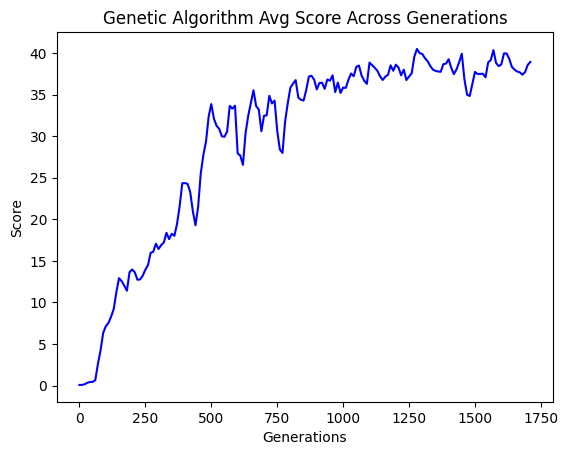

In [24]:
import matplotlib.pyplot as plt

# Create the first plot
fig, ax1 = plt.subplots()
xs = np.arange(0, 1720, 10)
window_size = 3
y_smooth = np.convolve(gen_scores2, np.ones(window_size) / window_size, mode='valid')

# Plot the first trend on the primary y-axis
ax1.plot(xs, y_smooth, color='b', label='Score')
ax1.set_xlabel('Generations')
ax1.set_ylabel('Score')
ax1.tick_params('y')

# Create a secondary y-axis
# ax2 = ax1.twinx()

# Plot the second trend on the secondary y-axis
# ax2.scatter(xs, gen_times2, color='r', label='Time-Steps Taken')
# ax2.set_ylabel('Time-steps Taken', color='r')
# ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Genetic Algorithm Avg Score Across Generations')
# fig.tight_layout()
# plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))

# Show the plot
plt.show()
